# Plotting Query Results

## Setup

In [1]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [12]:
# Import SQLAlchemy `automap` and other dependencies here
# YOUR CODE HERE
import sqlalchemy
from sqlalchemy import create_engine, inspect
from sqlalchemy.ext.automap import automap_base



In [13]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)

## Explore Database

In [15]:
# Use the Inspector to explore the database and print the table names
# YOUR CODE HERE
inspecteor = inspect(engine)
inspecteor.get_table_names()

['emoji']

In [18]:
# Use Inspector to print the column names and types
# YOUR CODE HERE
columns = [x['name'] for x in inspecteor.get_columns('emoji')]
columns

['id', 'emoji_char', 'emoji_id', 'name', 'score']

In [20]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
# YOUR CODE HERE
sql = '''
SELECT * 
FROM emoji
LIMIT 10
'''
engine.execute(sql).fetchall()

[(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150),
 (2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939),
 (3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416),
 (4, '♥️', '2665', 'BLACK HEART SUIT', 652715459),
 (5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922),
 (6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701),
 (7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849),
 (8, '😒', '1F612', 'UNAMUSED FACE', 441690175),
 (9, '💕', '1F495', 'TWO HEARTS', 381679908),
 (10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)]

## Reflect Database and Query

In [22]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [26]:
# Start a session to query the database
session = sqlalchemy.orm.Session(engine)

## Query to get the Emoji Data

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [35]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query results
# YOUR CODE HERE
# sql = '''
# SELECT id, emoji_char, score
# FROM emoji
# LIMIT 10
# '''
# ['id', 'emoji_char', 'emoji_id', 'name', 'score']
res = session.query(Emoji.id, Emoji.emoji_char, Emoji.score).order_by(Emoji.score.desc()).limit(10).all()

Unpack tuples using list comprehensions

In [39]:
# Unpack the "Top 10" `emoji_id` and `scores` from results and save into separate lists.
# YOUR CODE HERE
[(x[0], x[1]) for x in res]
emoji_id = [x[0] for x in res]
scores = [x[2] for x in res]
emoji_id, scores

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [1814832150,
  840619939,
  680382416,
  652715459,
  515991922,
  484540701,
  452489849,
  441690175,
  381679908,
  377847645])

## Plot using Matplotlib

<BarContainer object of 10 artists>

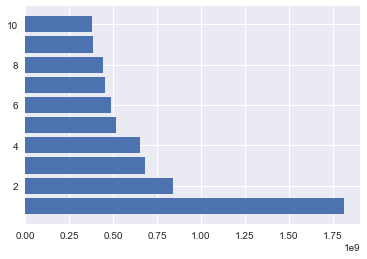

In [45]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
# YOUR CODE HERE
fig, ax = plt.subplots()
ax.barh(emoji_id, scores)

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [ ]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
# YOUR CODE HERE
df.head(10)

Plot using Pandas

In [ ]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
# YOUR CODE HERE

In [ ]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
# YOUR CODE HERE